# Visualizer for dataset in TFRecord

Notice that there are several things to do before visualizaation.

For example, if you want to visualize ROCO dataset.
1. Place your ROCO dataset under `iRM_Autonomy_2020\dnn\data\DJI ROCO` and place the `DJI ROCO` folder.
2. Run the `roco.py` in order to generate TFRecord files from ROCO dataset.
3. Run the codes below to visualize (remember to place `sample_per_TFRecord` and `input_path` below).

In [1]:
import os
import tensorflow as tf
import sys
# if you choose to visualize images with opencv, please uncomment and comment some codes below and other necessary codes.
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils import CLASS_NAMES

Please say how many samples you want to show per TFRecord.

In [2]:
sample_per_TFRecord = 1
input_path = '../DJI ROCO TFRecord/'
# input_path = '../Purdue Dataset TFRecord/'

In [3]:
IMAGE_FEATURE_MAP = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'object': tf.io.FixedLenFeature([], tf.string),
    'bbox': tf.io.FixedLenFeature([], tf.string),
}


def _parse_image_function(example_proto):
    examples = tf.io.parse_single_example(example_proto, IMAGE_FEATURE_MAP)
    return examples


def draw_outputs(img, outputs, class_names):
    boxes, objectness, classes, nums = outputs
    boxes, objectness, classes, nums = boxes[0], objectness[0], classes[0], nums[0]
    wh = np.flip(img.shape[0:2])
    for i in range(nums):
        x1y1 = tuple((np.array(boxes[i][0:2]) * wh).astype(np.int32))
        x2y2 = tuple((np.array(boxes[i][2:4]) * wh).astype(np.int32))
        img = cv2.rectangle(img, x1y1, x2y2, (255, 0, 0), 2)
        img = cv2.putText(img, '{} {}%'.format(class_names[int(classes[i])], int(objectness[i] * 100)), 
                          x1y1, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 248, 248), 2)
#         img = cv2.putText(img, '{} {}%'.format(class_names[int(classes[i])], int(objectness[i] * 100)), 
#                           x1y1, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (248, 248, 0), 2)
    return img

### the 1 dataset
         the 1 picture


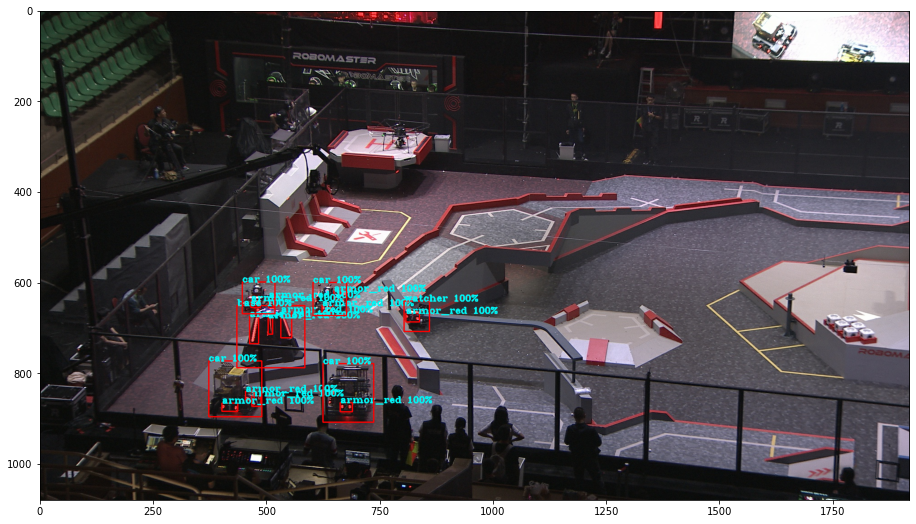

### the 2 dataset
         the 1 picture


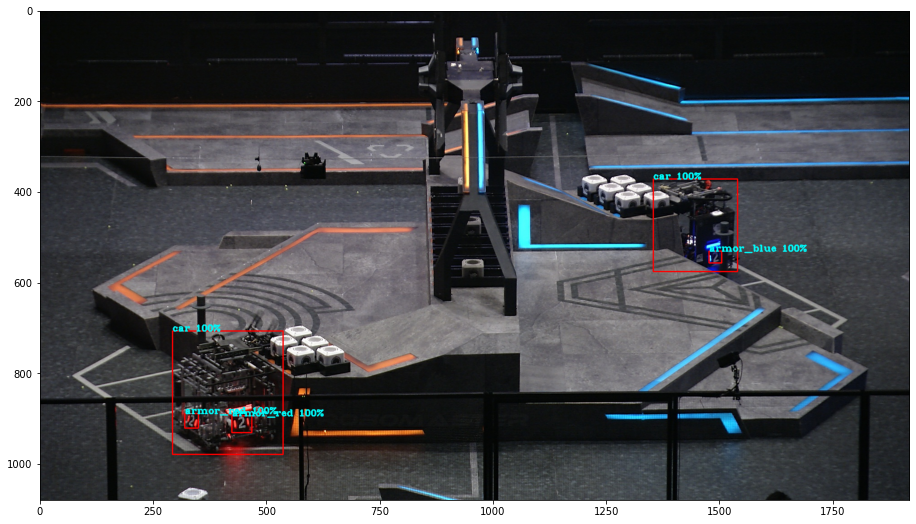

### the 3 dataset
         the 1 picture


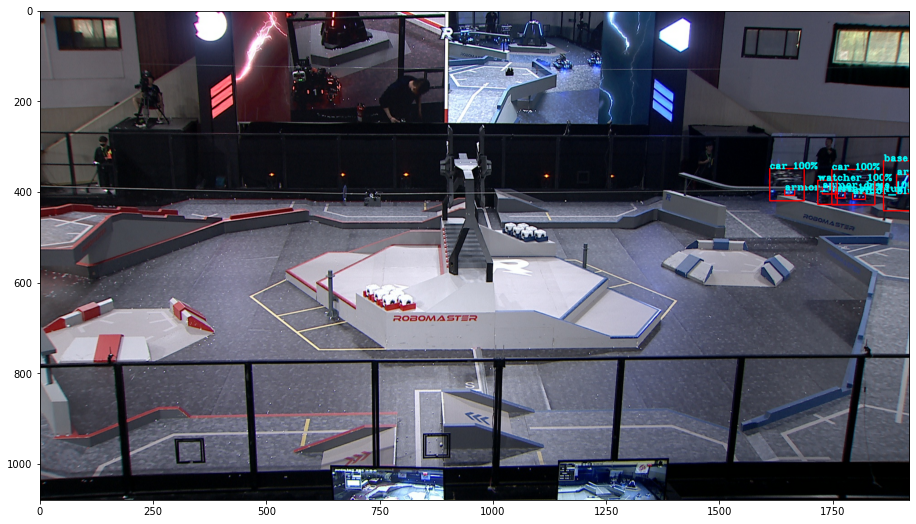

### the 4 dataset
         the 1 picture


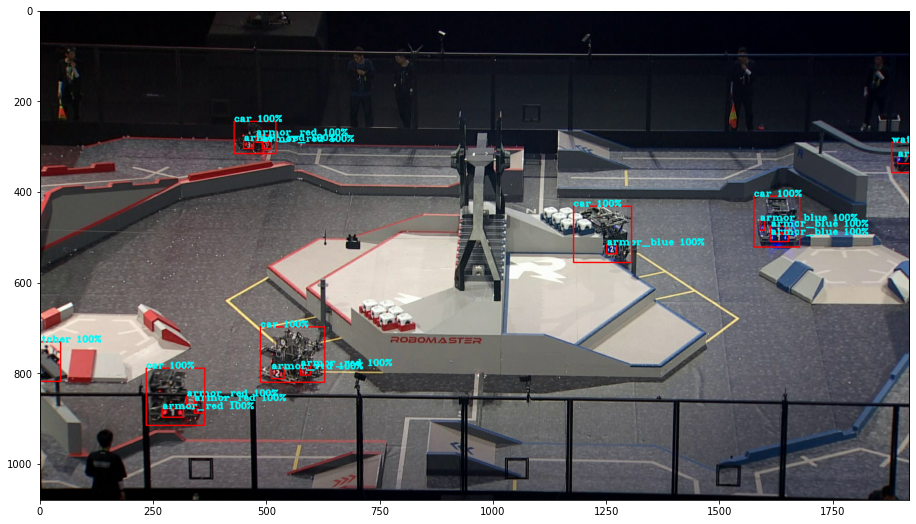

In [4]:
folder_ids = os.listdir(input_path)
for n, training_id in enumerate(folder_ids):
    training_data = tf.data.TFRecordDataset(input_path + training_id)
    data_set = training_data.map(_parse_image_function)
    tf.print('### the {} dataset'.format(n + 1), output_stream=sys.stdout)
    for m, image_features in enumerate(data_set):
        tf.print('         the {} picture'.format(m + 1), output_stream=sys.stdout)
        image_raw = tf.io.decode_image(image_features['image'], channels=3)
        objects = tf.io.parse_tensor(image_features['object'], tf.int32)
        bboxes = tf.io.parse_tensor(image_features['bbox'], tf.float32)
        width = image_raw.shape[1]
        height = image_raw.shape[0]
        boxes = []
        scores = []
        classes = []
        for p, label in enumerate(objects):
            boxes.append([bboxes[p][0] / width,
                          bboxes[p][1] / height,
                          bboxes[p][2] / width,
                          bboxes[p][3] / height])
            scores.append(1)
            classes.append(objects[p])
        nums = [len(boxes)]
        boxes = [boxes]
        scores = [scores]
        classes = [classes]
#         img = cv2.cvtColor(image_raw.numpy(), cv2.COLOR_RGB2BGR)
#         img = draw_outputs(img, (boxes, scores, classes, nums), CLASS_NAMES)
#         cv2.imshow("RM Training Set", img)
#         cv2.waitKey(0)
        img = draw_outputs(image_raw.numpy(), (boxes, scores, classes, nums), CLASS_NAMES)
        plt.figure(figsize=(18,9))
        plt.imshow(img)
        plt.show()
        if m == sample_per_TFRecord - 1:
            break
# cv2.destroyWindow("RM Training Set")